# Compare the precipitation data for HBV

In this Notebook different sources of forcing data for the HBV model.

The compared precipitation data:<br>
    - Maastricht KNMI weather station (the Netherlands)<br>
    - Gemmenich SPW precipitation station (Belgium)<br>
    - NRR data at the measurement locations<br>
    - Mean of the NRR data per subcatchment

In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import geopandas as gpd
import matplotlib.pyplot as plt
from datetime import datetime,timedelta

C:\Users\924259\AppData\Local\Temp\ipykernel_25776\1453402398.py:4: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas as gpd


In [2]:
folder = r"C:\Users\924259\OneDrive - Royal HaskoningDHV\Documents\Master thesis Daan Idsinga\Data\Precipitation - NRR"

## Load NRR point data at the measurement locations

In [7]:
data = pd.read_csv(f'{folder}/Point data/output_nrr.csv',index_col=[0],parse_dates=[0])
data.columns = ['Meerssen','Gulp','Eyserbeek','Selzerbeek','Hommerich','Sippenaeken']
data.index.names = ['time']

In [8]:
data.index = data.index.tz_localize(None)

In [9]:
cal_meas_loc = data.loc['2019-01-01 01:00:00':'2020-07-01 01:00:00']

Convert from UTC +1 to UTC +0

In [10]:
cal_meas_loc.index = cal_meas_loc.index - timedelta(hours=1)

In [11]:
val_meas_loc = data.loc['2020-07-01 01:00:00':'2022-04-01 01:00:00']

Convert UTC +1 to UTC +0

In [12]:
val_meas_loc.index = val_meas_loc.index - timedelta(hours=1)

## Load data of KNMI weather station Maastricht

In [13]:
maastricht = pd.read_csv(f'{folder}/Maastricht_Precipitation.csv',index_col=[0],parse_dates=[0])
maastricht.index.names = ['time']
maastricht.tz_localize(None)
cal_maastricht = maastricht['2019-01-01':'2020-07-01 00:00:00']
val_maastricht = maastricht['2020-07-01':'2022-04-01 00:00:00']

## Load data of SPW precipitation station Gemmenich

In [14]:
gemmenich = pd.read_excel(f'{folder}/DGH_5284_Precip_hTotal.xlsx',skiprows=9,index_col=[0],parse_dates=[0])
gemmenich.index.names = ['time']
gemmenich.index = gemmenich.index - timedelta(hours=2)
cal_gemmenich = gemmenich['2019-01-01':'2020-07-01 00:00:00']
val_gemmenich = gemmenich['2020-07-01':'2022-04-01 00:00:00']

## Load subcatchment mean data

In [15]:
cal_mean = pd.read_csv(f'{folder}/Subcatchments/calibration_precipitation_mean.csv',index_col=[0],parse_dates=[0])
val_mean = pd.read_csv(f'{folder}/Subcatchments/validation_precipitation_mean.csv',index_col=[0],parse_dates=[0])

## Load radar data

In [3]:
cal_radar = xr.open_dataset(f'{folder}/NRR_data_calibration_org.nc')
val_radar = xr.open_dataset(f'{folder}/NRR_data_validation_org.nc')

## Load Geul shapefile

In [7]:
geul_shape = gpd.read_file(f'{folder}/Subcatchments/GEU_Qstrgbd.shp')
geul_shape.to_crs('4326',inplace=True)

## Calibration period 

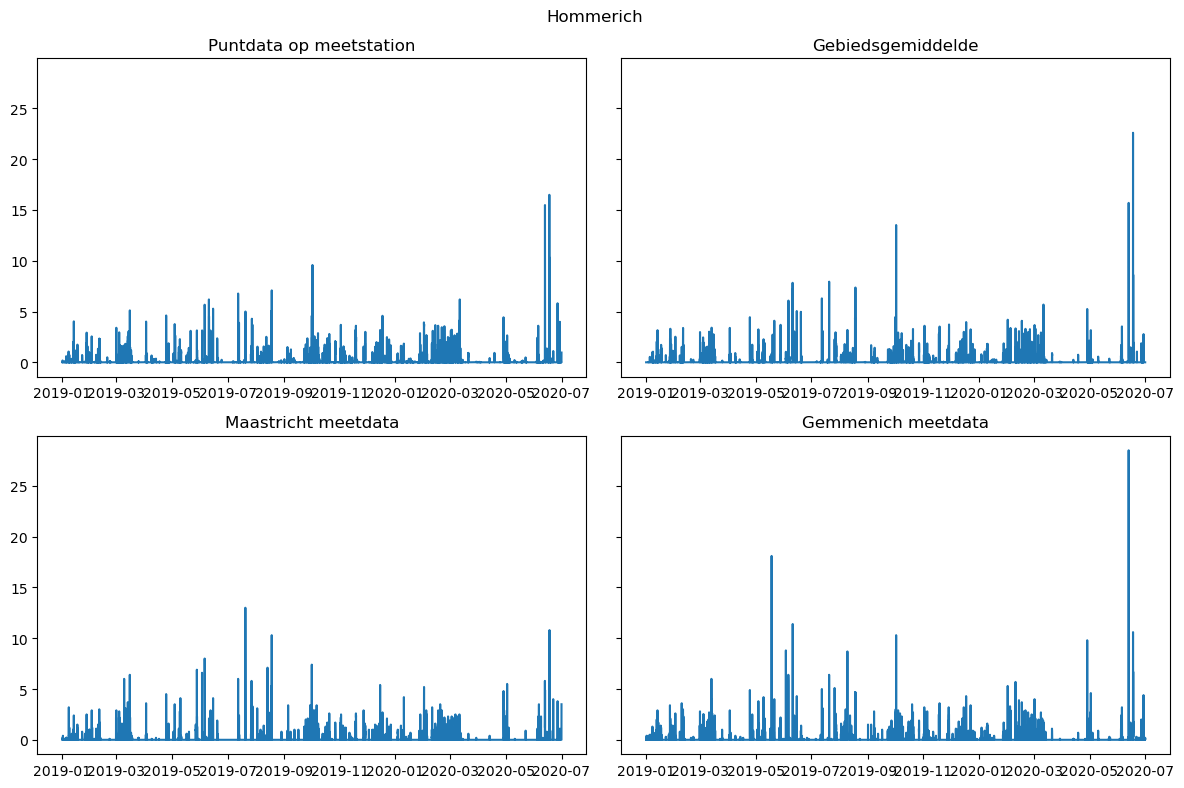

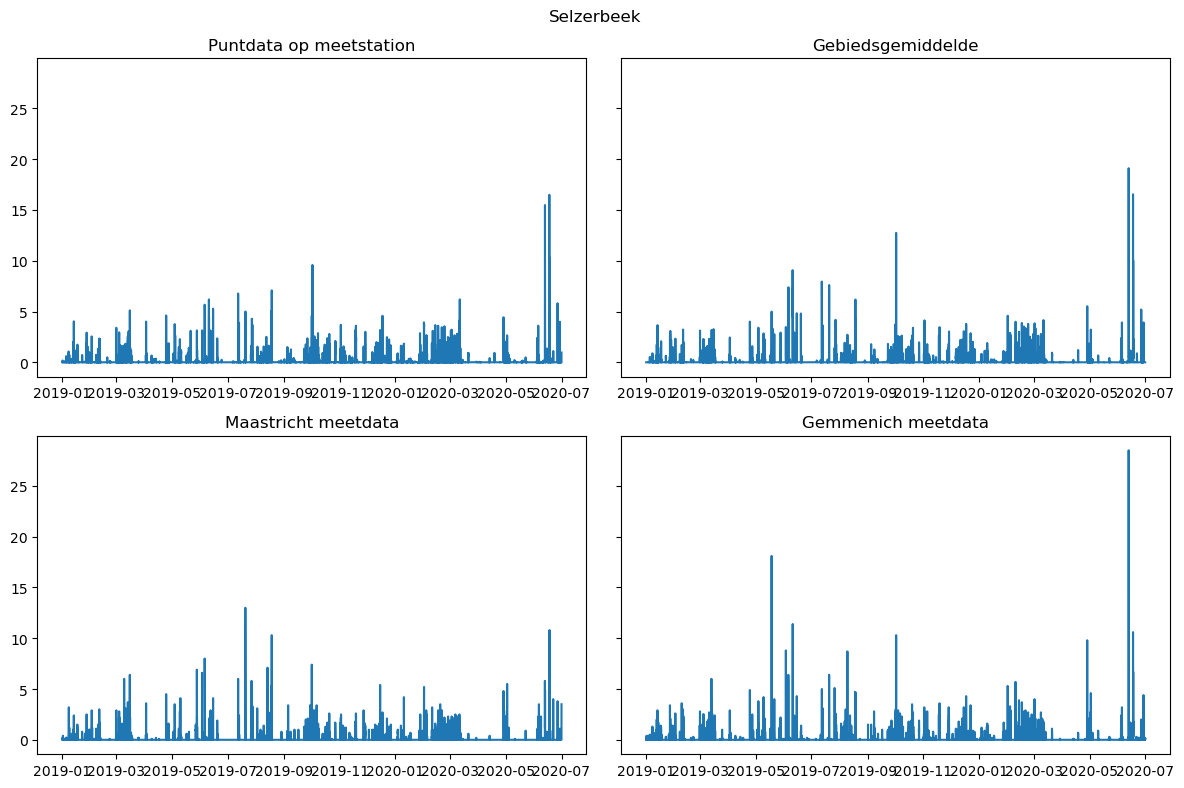

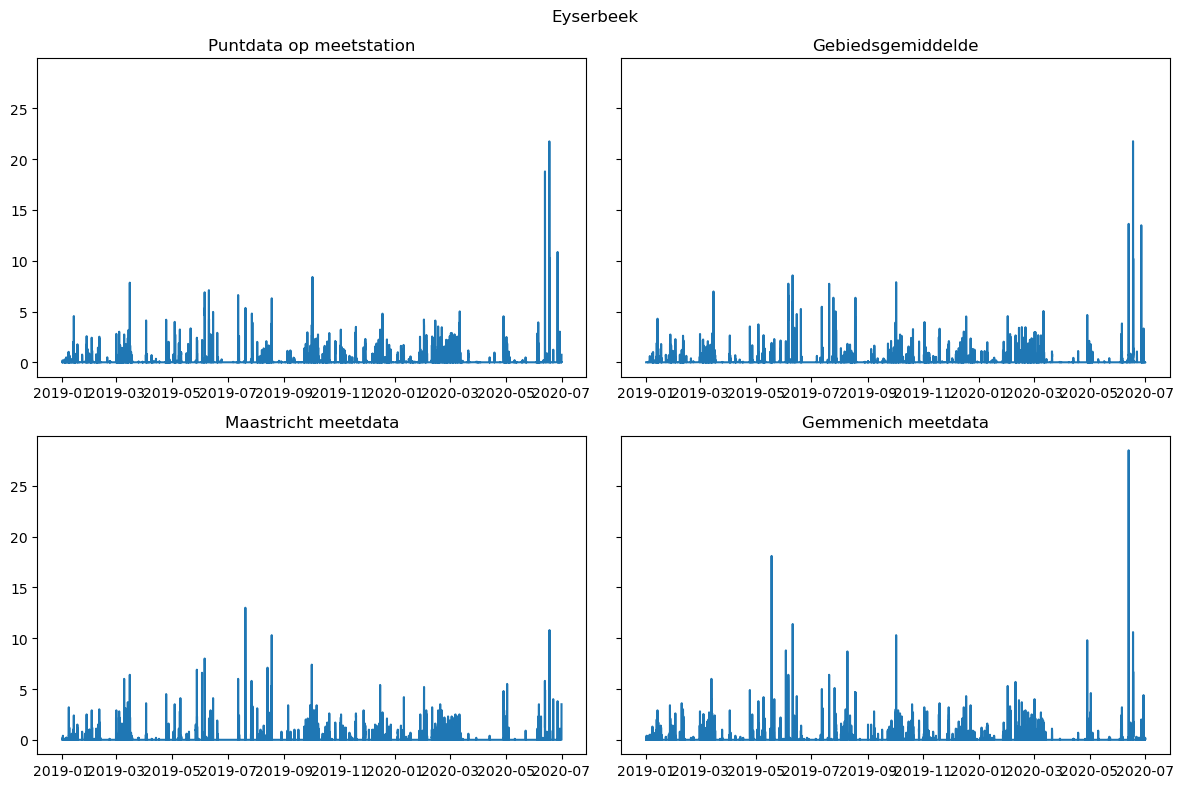

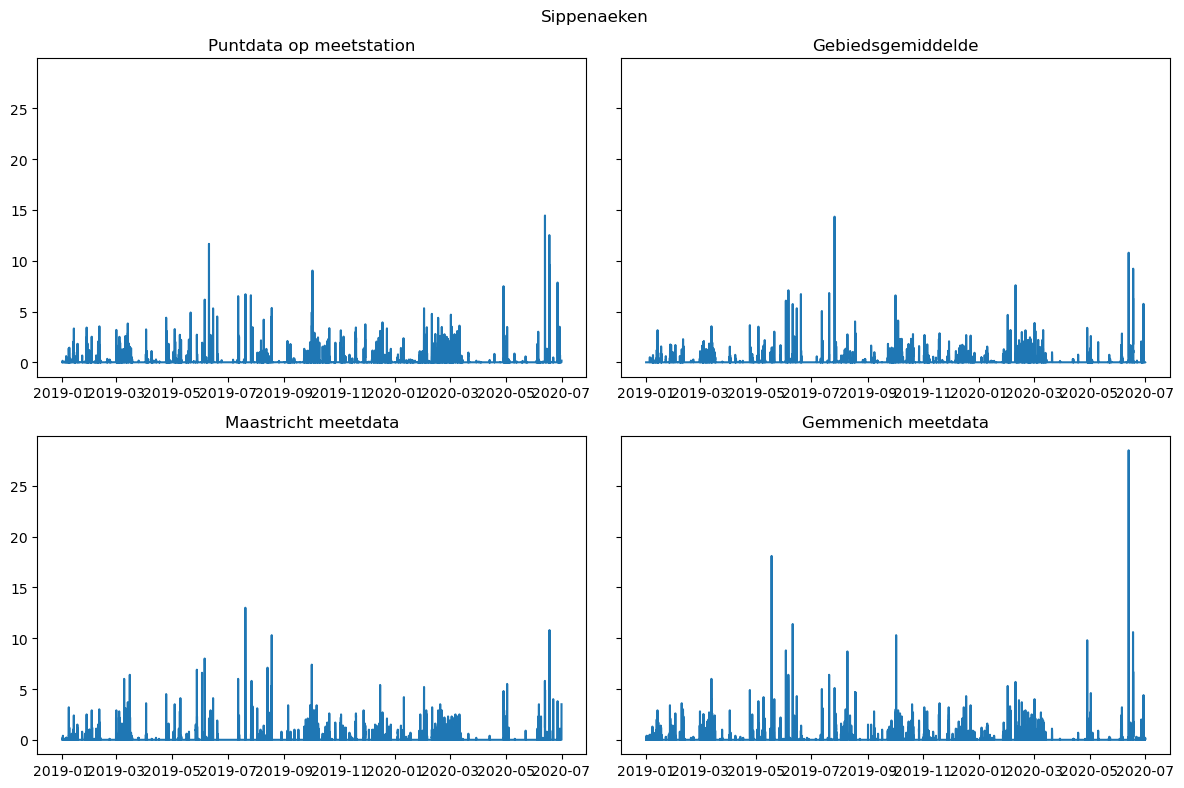

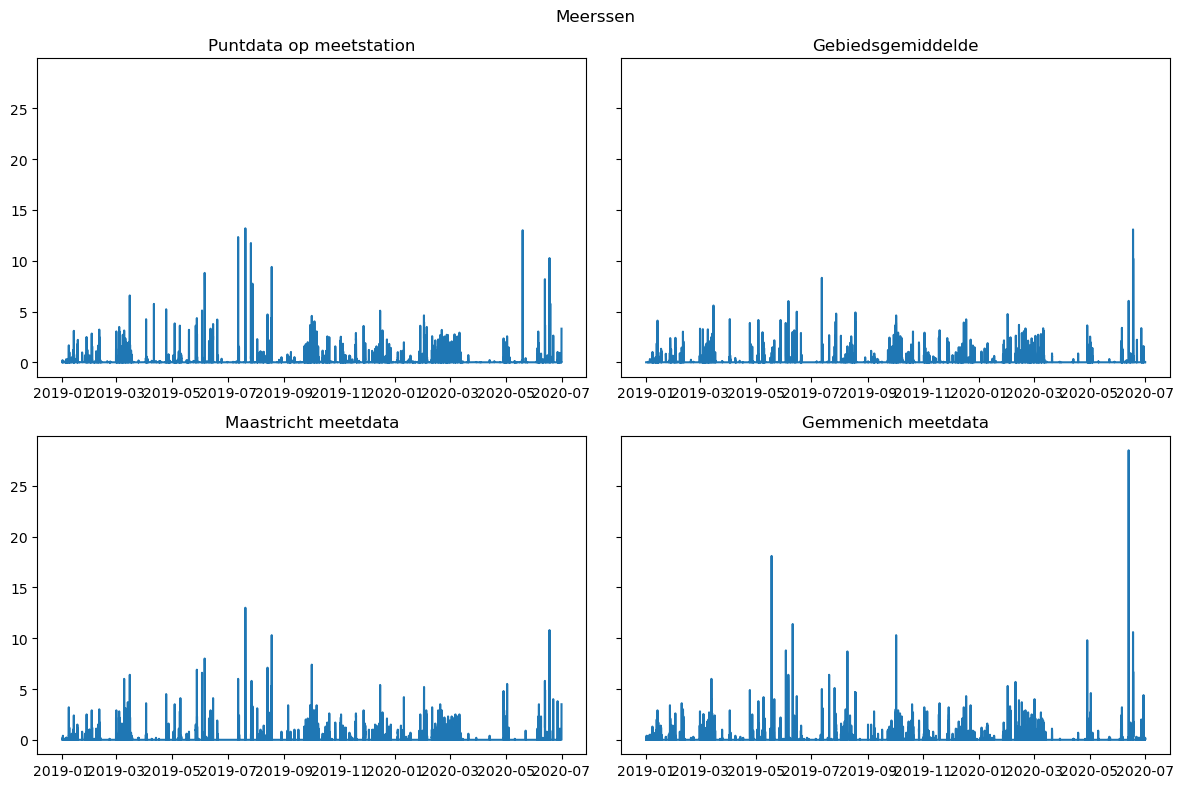

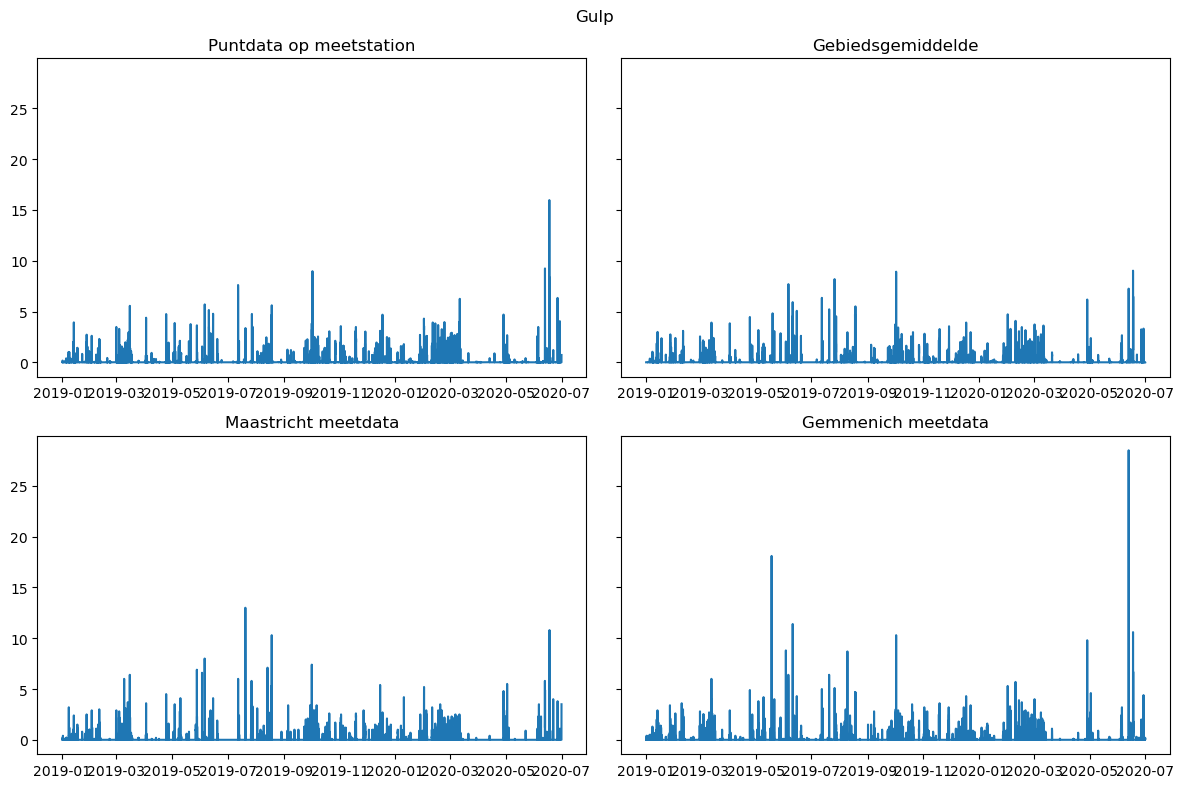

In [18]:
for name in cal_mean.columns:
    fig,ax = plt.subplots(2,2, sharey=True, figsize=(12,8))
    ax[0,0].plot(cal_meas_loc[f'{name}'])
    ax[0,0].set_title('Puntdata op meetstation')
    ax[0,1].plot(cal_mean[f'{name}'])
    ax[0,1].set_title('Gebiedsgemiddelde')
    ax[1,0].plot(cal_maastricht)
    ax[1,0].set_title('Maastricht meetdata')
    ax[1,1].plot(cal_gemmenich)
    ax[1,1].set_title('Gemmenich meetdata')
    plt.suptitle(f'{name}')
    fig.tight_layout()

## Validation period

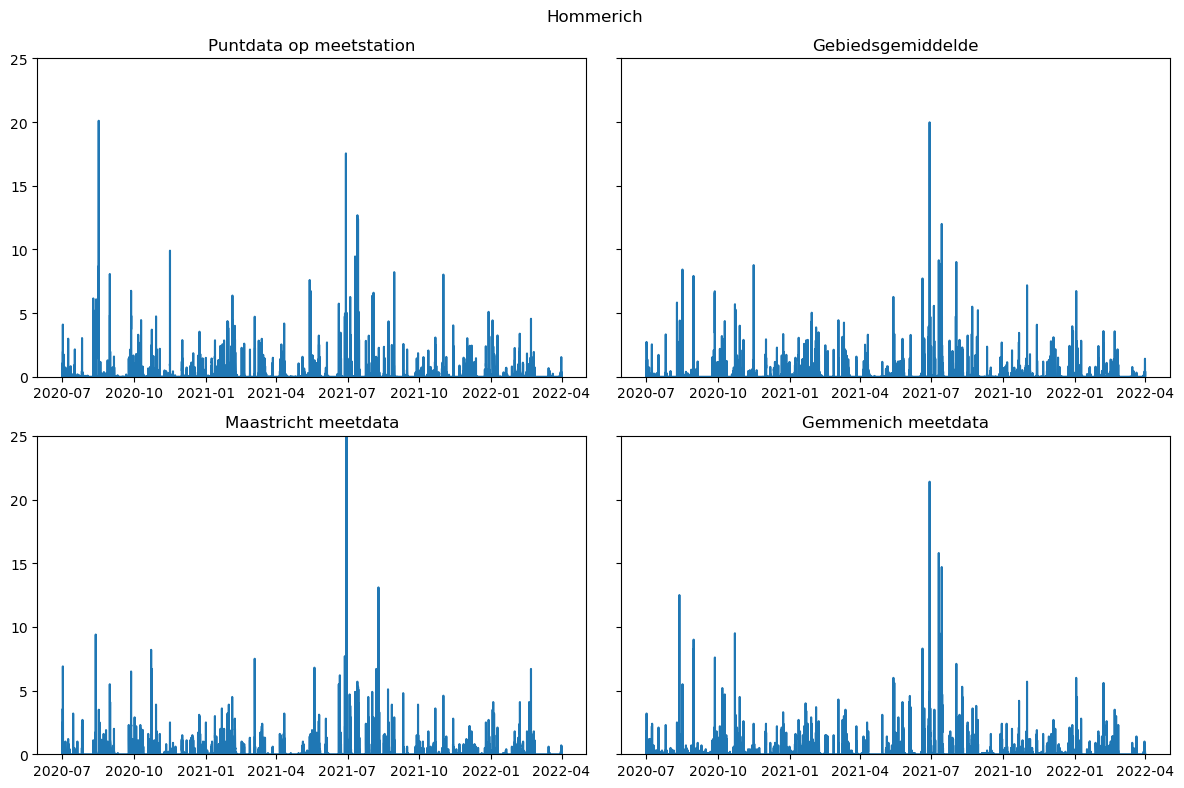

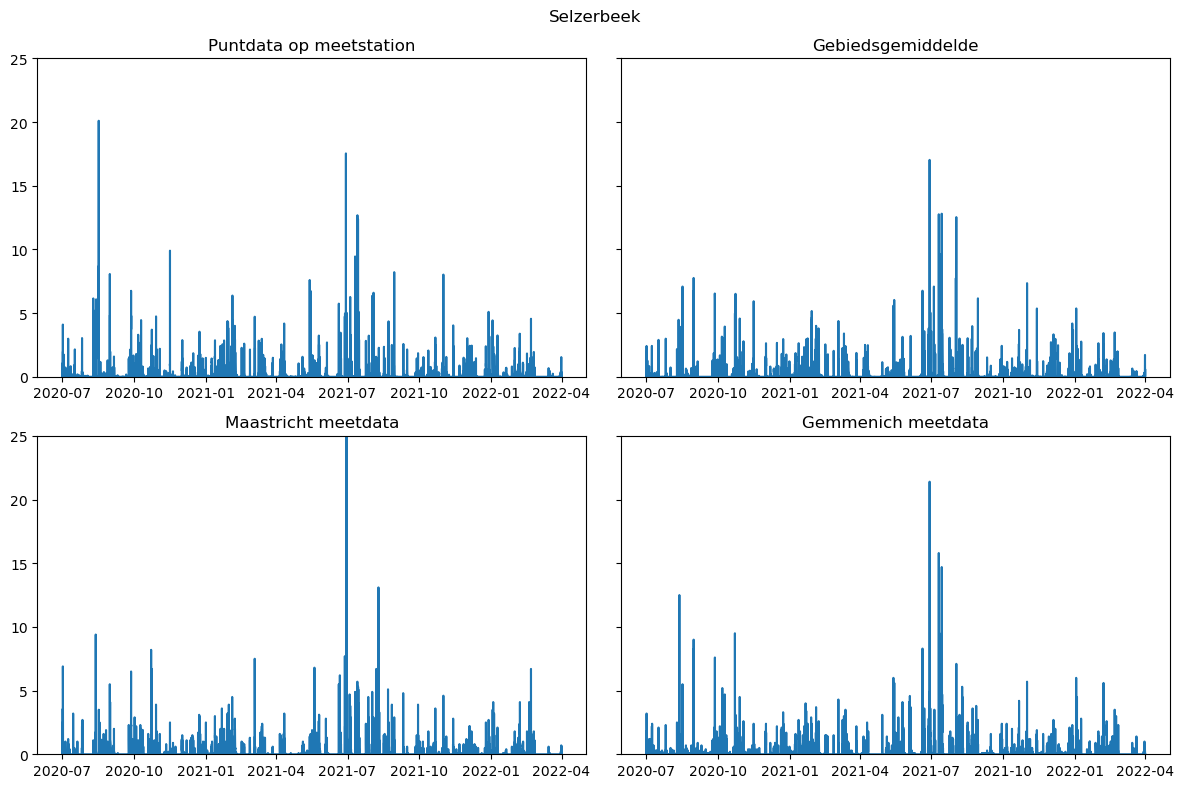

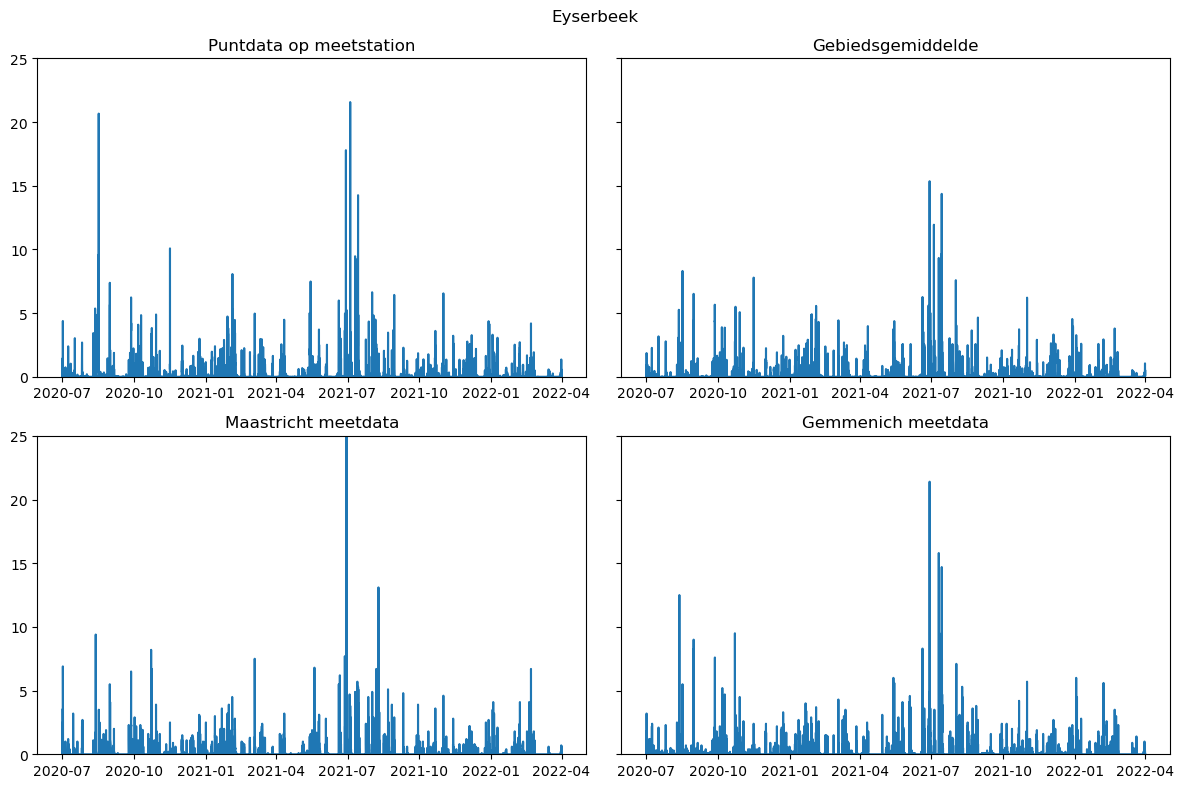

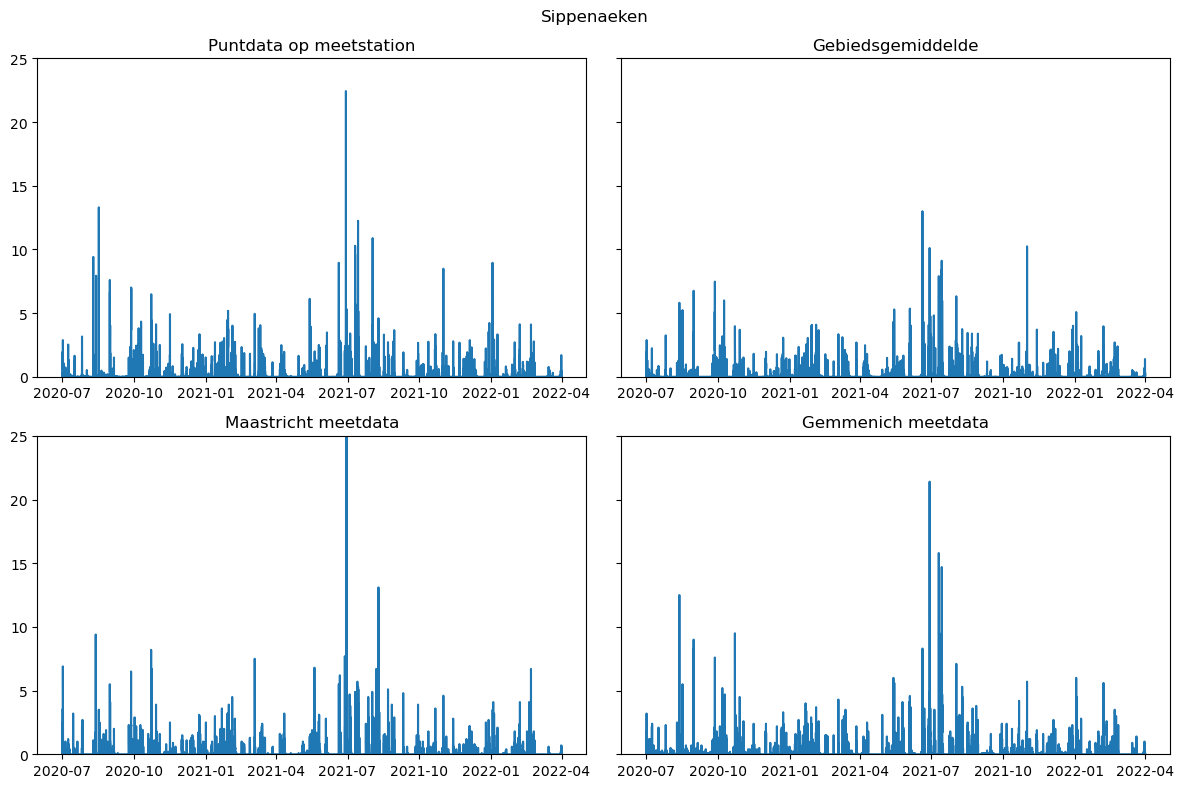

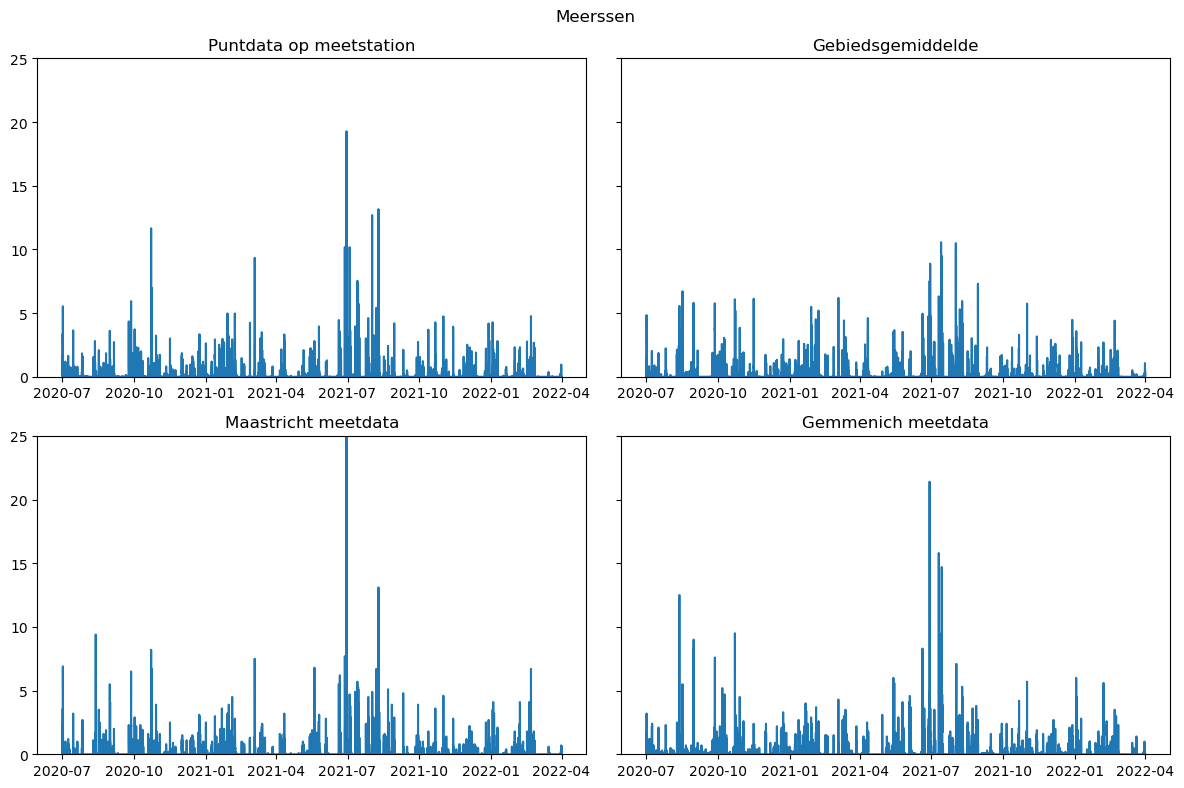

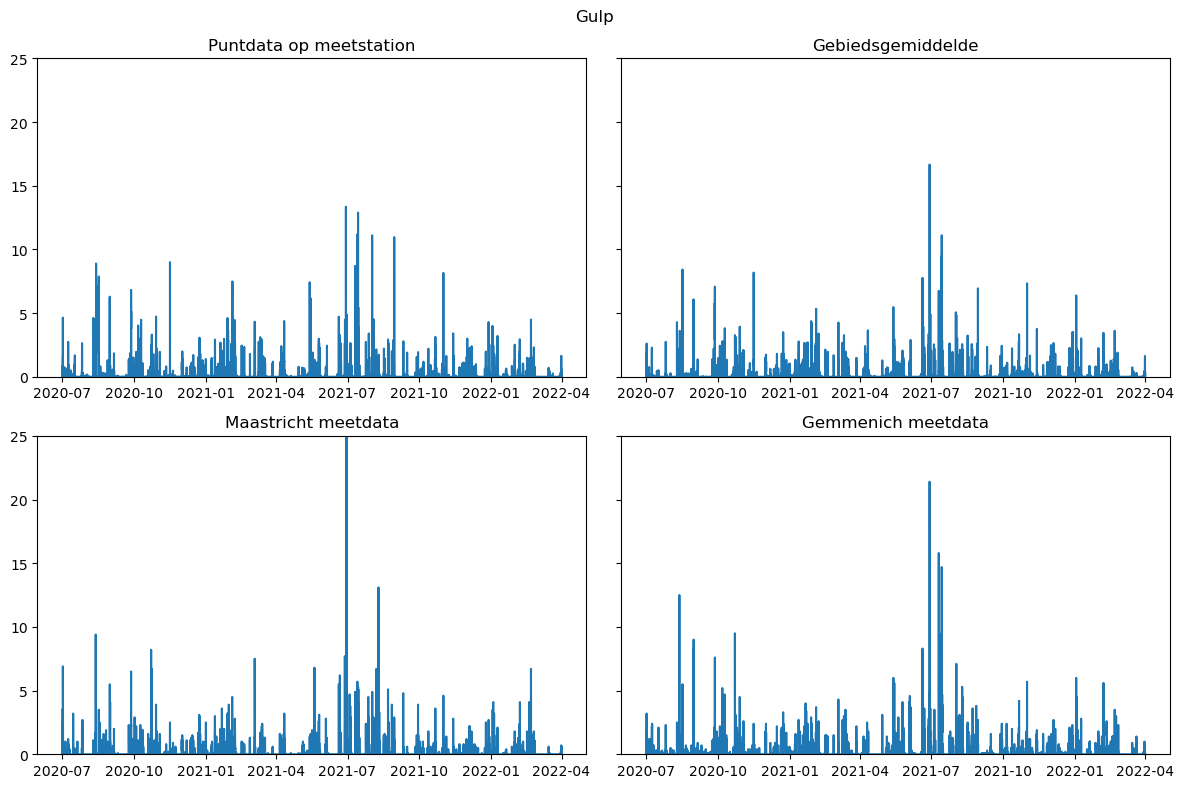

In [19]:
for name in val_mean.columns:
    fig,ax = plt.subplots(2,2, sharey=True, figsize=(12,8))
    plt.ylim(0,25)
    ax[0,0].plot(val_meas_loc[f'{name}'])
    ax[0,0].set_title('Puntdata op meetstation')
    ax[0,1].plot(val_mean[f'{name}'])
    ax[0,1].set_title('Gebiedsgemiddelde')
    ax[1,0].plot(val_maastricht)
    ax[1,0].set_title('Maastricht meetdata')
    ax[1,1].plot(val_gemmenich)
    ax[1,1].set_title('Gemmenich meetdata')
    plt.suptitle(f'{name}')
    fig.tight_layout()

## Plot locations

Locations of the measurement locations and the weather stations

In [5]:
Meerssen = [5.725796,50.89121]
Hommerich = [5.913613,50.80709]
Eyserbeek = [5.929379,50.82533]
Selzerbeek = [5.921602,50.81058]
Gulp = [5.891506,50.81409]
Sippenaeken = [5.940761,50.75047]

Maastricht = [5.704189,50.87177]
Gemmenich = [5.974898,50.74865]

A nice plot of the locations of the different data sources for in the appendix

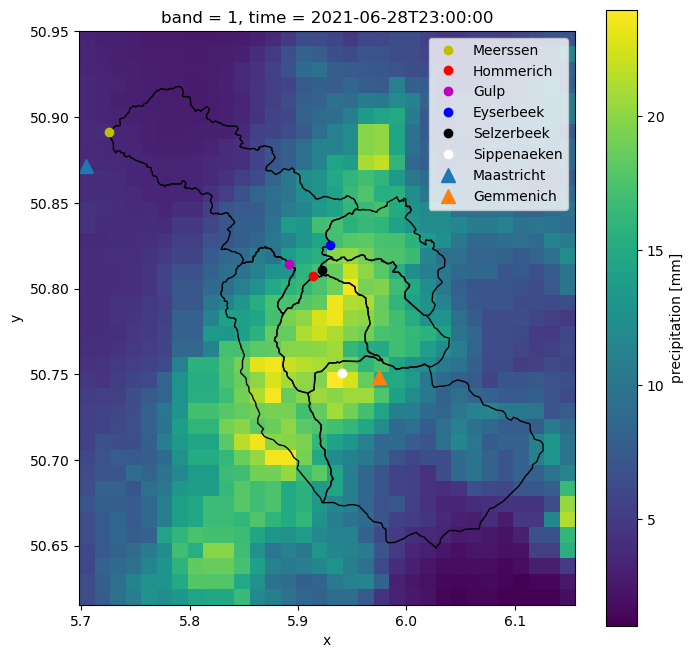

In [47]:
fig, ax = plt.subplots(figsize=(8,8))

val_radar.precipitation.sel(time='2021-06-28T23:00:00').plot(ax=ax)

plt.plot(Meerssen[0],Meerssen[1],'yo',label='Meerssen')
plt.plot(Hommerich[0],Hommerich[1],'ro',label='Hommerich')
plt.plot(Gulp[0],Gulp[1],'mo',label='Gulp')
plt.plot(Eyserbeek[0],Eyserbeek[1],'bo',label='Eyserbeek')
plt.plot(Selzerbeek[0],Selzerbeek[1],'ko',label='Selzerbeek')
plt.plot(Sippenaeken[0],Sippenaeken[1],'wo',label='Sippenaeken')

plt.plot(Maastricht[0],Maastricht[1],'^',label='Maastricht',ms=10)
plt.plot(Gemmenich[0],Gemmenich[1],'^',label='Gemmenich',ms=10)

geul_shape.plot(ax=ax, edgecolor='black', color='none')

plt.legend(loc='best');

## Check Maastricht maximum

## Calibration period 

In [103]:
print(f'The large peak at the Maastricht weather station during the calibration period of {cal_maastricht.max()} mm occurs on {cal_maastricht.idxmax()}')

The large peak at the Maastricht weather station during the calibration period of Precipitation    13.0
dtype: float64 mm occurs on Precipitation   2019-07-20 12:00:00
dtype: datetime64[ns]


#### Values at measurement locations

In [105]:
cal_meas_loc.loc[cal_maastricht.idxmax()]

,Meerssen,Gulp,Eyserbeek,Selzerbeek,Hommerich,Sippenaeken
time,,,,,,
2019-07-20 12:00:00,13.19,0.12,0.04,0.12,0.12,3.47


#### Mean subcatchment values

In [106]:
cal_mean.loc[cal_maastricht.idxmax()]

,Hommerich,Selzerbeek,Eyserbeek,Sippenaeken,Meerssen,Gulp
time,,,,,,
2019-07-20 12:00:00,2.921393,1.469981,0.697032,0.793077,1.474693,1.580506


#### Gemmenich value

In [190]:
cal_gemmenich.loc[cal_maastricht.idxmax()]

,Value
time,
2019-07-20 12:00:00,0.2


#### Plot of the radar 

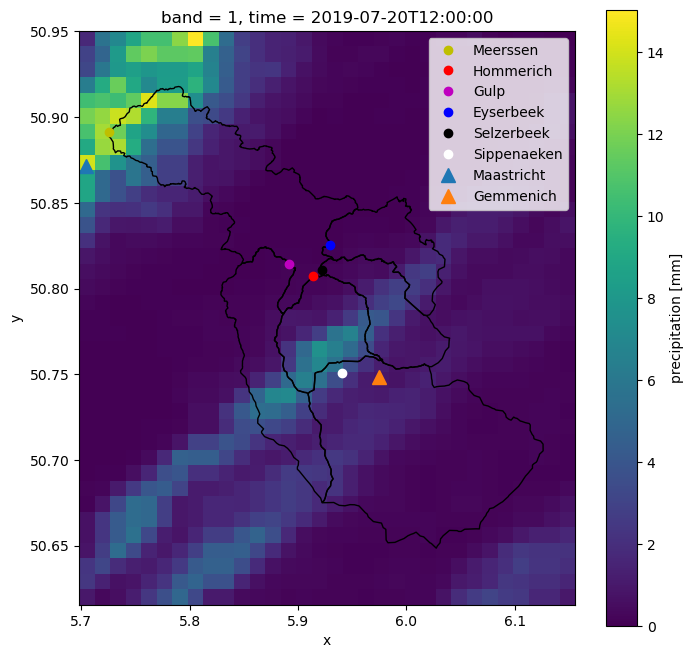

In [189]:
fig, ax = plt.subplots(figsize=(8,8))

cal_radar.precipitation.sel(time='2019-07-20T12:00:00').plot(ax=ax)

plt.plot(Meerssen[0],Meerssen[1],'yo',label='Meerssen')
plt.plot(Hommerich[0],Hommerich[1],'ro',label='Hommerich')
plt.plot(Gulp[0],Gulp[1],'mo',label='Gulp')
plt.plot(Eyserbeek[0],Eyserbeek[1],'bo',label='Eyserbeek')
plt.plot(Selzerbeek[0],Selzerbeek[1],'ko',label='Selzerbeek')
plt.plot(Sippenaeken[0],Sippenaeken[1],'wo',label='Sippenaeken')

plt.plot(Maastricht[0],Maastricht[1],'^',label='Maastricht',ms=10)
plt.plot(Gemmenich[0],Gemmenich[1],'^',label='Gemmenich',ms=10)

geul_shape.plot(ax=ax, edgecolor='black', color='none')

plt.legend(loc='best');

## Validation period

In [112]:
print(f'The large peak at the Maastricht weather station during the validation period of {val_maastricht.max()} mm occurs on {val_maastricht.idxmax()}')

The large peak at the Maastricht weather station during the validation period of Precipitation    67.0
dtype: float64 mm occurs on Precipitation   2021-06-29 17:00:00
dtype: datetime64[ns]


In [113]:
val_meas_loc.loc[val_maastricht.idxmax()]

,Meerssen,Gulp,Eyserbeek,Selzerbeek,Hommerich,Sippenaeken
time,,,,,,
2021-06-29 17:00:00,19.273775,1.501613,1.823832,1.63794,1.63794,0.937599


In [114]:
val_mean.loc[val_maastricht.idxmax()]

,Hommerich,Selzerbeek,Eyserbeek,Sippenaeken,Meerssen,Gulp
time,,,,,,
2021-06-29 17:00:00,1.023283,1.960959,2.318267,1.641157,8.877311,1.073426


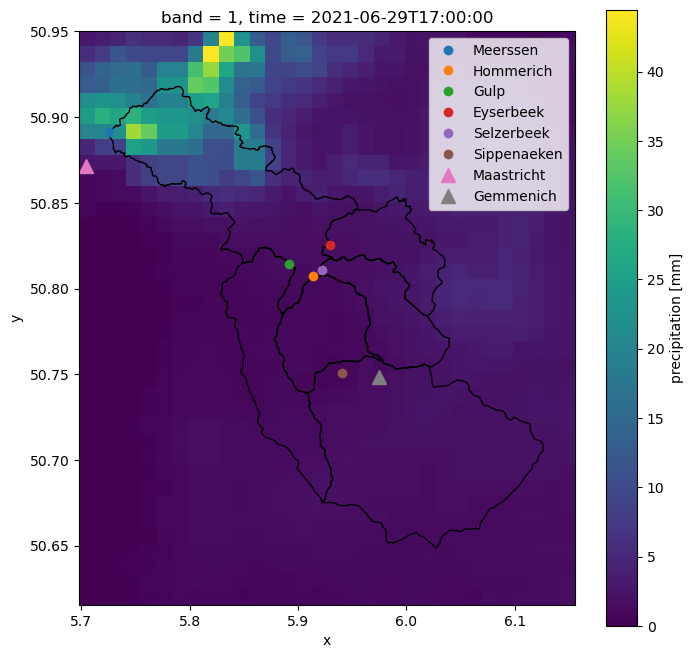

In [118]:
fig, ax = plt.subplots(figsize=(8,8))

val_radar.precipitation.sel(time='2021-06-29T17:00:00').plot(ax=ax)

plt.plot(Meerssen[0],Meerssen[1],'o',label='Meerssen')
plt.plot(Hommerich[0],Hommerich[1],'o',label='Hommerich')
plt.plot(Gulp[0],Gulp[1],'o',label='Gulp')
plt.plot(Eyserbeek[0],Eyserbeek[1],'o',label='Eyserbeek')
plt.plot(Selzerbeek[0],Selzerbeek[1],'o',label='Selzerbeek')
plt.plot(Sippenaeken[0],Sippenaeken[1],'o',label='Sippenaeken')

plt.plot(Maastricht[0],Maastricht[1],'^',label='Maastricht',ms=10)
plt.plot(Gemmenich[0],Gemmenich[1],'^',label='Gemmenich',ms=10)

geul_shape.plot(ax=ax, edgecolor='black', color='none')

plt.legend(loc='best');

## Check Gemmenich maximum

## Calibration period

In [121]:
print(f'The peak at the Gemmenich weatherstation during the calibration period of {cal_gemmenich.max()} mm occurs on {cal_gemmenich.idxmax()}')

The peak at the Gemmenich weatherstation during the calibration period of Value    28.5
dtype: float64 mm occurs on Value   2020-06-12 21:00:00
dtype: datetime64[ns]


In [122]:
cal_meas_loc.loc[cal_gemmenich.idxmax()]

,Meerssen,Gulp,Eyserbeek,Selzerbeek,Hommerich,Sippenaeken
time,,,,,,
2020-06-12 21:00:00,0.81,9.24,18.790001,15.48,15.48,14.45


In [123]:
cal_mean.loc[cal_gemmenich.idxmax()]

,Hommerich,Selzerbeek,Eyserbeek,Sippenaeken,Meerssen,Gulp
time,,,,,,
2020-06-12 21:00:00,15.693809,19.106255,13.629114,10.787972,6.050015,7.251899


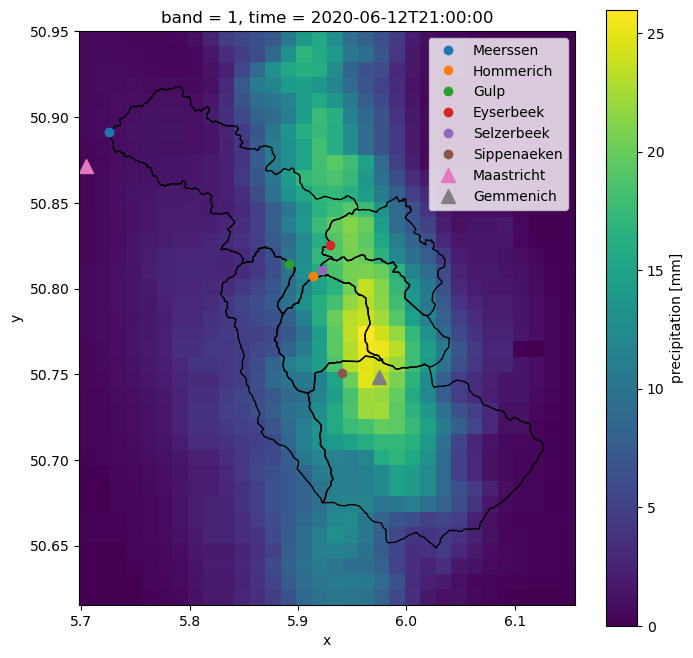

In [124]:
fig, ax = plt.subplots(figsize=(8,8))

cal_radar.precipitation.sel(time='2020-06-12T21:00:00').plot(ax=ax)

plt.plot(Meerssen[0],Meerssen[1],'o',label='Meerssen')
plt.plot(Hommerich[0],Hommerich[1],'o',label='Hommerich')
plt.plot(Gulp[0],Gulp[1],'o',label='Gulp')
plt.plot(Eyserbeek[0],Eyserbeek[1],'o',label='Eyserbeek')
plt.plot(Selzerbeek[0],Selzerbeek[1],'o',label='Selzerbeek')
plt.plot(Sippenaeken[0],Sippenaeken[1],'o',label='Sippenaeken')

plt.plot(Maastricht[0],Maastricht[1],'^',label='Maastricht',ms=10)
plt.plot(Gemmenich[0],Gemmenich[1],'^',label='Gemmenich',ms=10)

geul_shape.plot(ax=ax, edgecolor='black', color='none')

plt.legend(loc='best');

## Validation period

In [127]:
print(f'The peak at the Gemmenich weatherstation during the validation period of {val_gemmenich.max()} mm occurs on {val_gemmenich.idxmax()}')

The peak at the Gemmenich weatherstation during the validation period of Value    21.4
dtype: float64 mm occurs on Value   2021-06-28 23:00:00
dtype: datetime64[ns]


In [128]:
val_meas_loc.loc[val_gemmenich.idxmax()]

,Meerssen,Gulp,Eyserbeek,Selzerbeek,Hommerich,Sippenaeken
time,,,,,,
2021-06-28 23:00:00,4.19837,13.351639,17.788311,17.535656,17.535656,22.428219


In [129]:
val_mean.loc[val_gemmenich.idxmax()]

,Hommerich,Selzerbeek,Eyserbeek,Sippenaeken,Meerssen,Gulp
time,,,,,,
2021-06-28 23:00:00,19.976234,17.028164,15.353907,10.108643,7.522994,16.659878


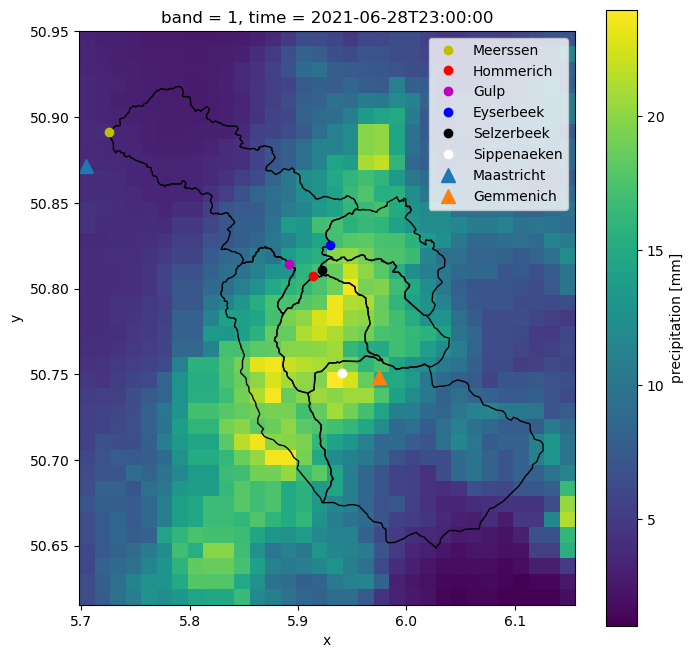

In [182]:
fig, ax = plt.subplots(figsize=(8,8))

val_radar.precipitation.sel(time='2021-06-28T23:00:00').plot(ax=ax)

plt.plot(Meerssen[0],Meerssen[1],'yo',label='Meerssen')
plt.plot(Hommerich[0],Hommerich[1],'ro',label='Hommerich')
plt.plot(Gulp[0],Gulp[1],'mo',label='Gulp')
plt.plot(Eyserbeek[0],Eyserbeek[1],'bo',label='Eyserbeek')
plt.plot(Selzerbeek[0],Selzerbeek[1],'ko',label='Selzerbeek')
plt.plot(Sippenaeken[0],Sippenaeken[1],'wo',label='Sippenaeken')

plt.plot(Maastricht[0],Maastricht[1],'^',label='Maastricht',ms=10)
plt.plot(Gemmenich[0],Gemmenich[1],'^',label='Gemmenich',ms=10)

geul_shape.plot(ax=ax, edgecolor='black', color='none')

plt.legend(loc='best');

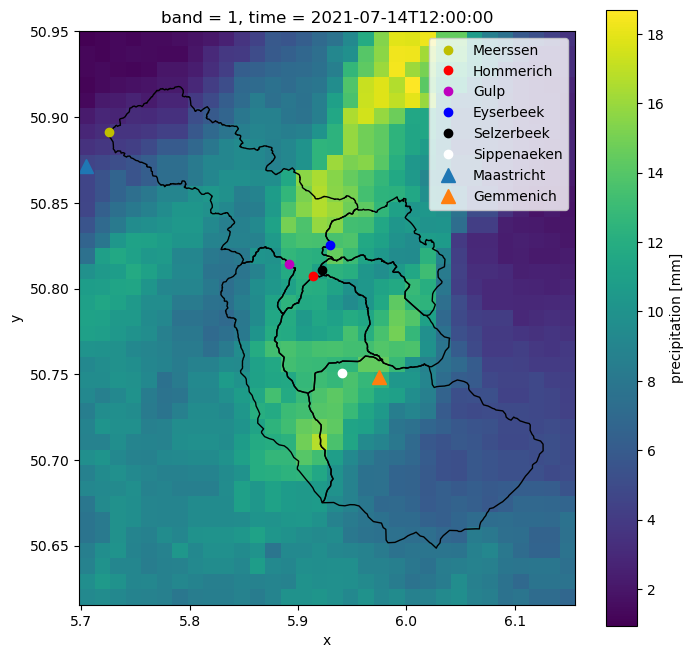

In [9]:
fig, ax = plt.subplots(figsize=(8,8))

val_radar.precipitation.sel(time='2021-07-14T12:00:00').plot(ax=ax)

plt.plot(Meerssen[0],Meerssen[1],'yo',label='Meerssen')
plt.plot(Hommerich[0],Hommerich[1],'ro',label='Hommerich')
plt.plot(Gulp[0],Gulp[1],'mo',label='Gulp')
plt.plot(Eyserbeek[0],Eyserbeek[1],'bo',label='Eyserbeek')
plt.plot(Selzerbeek[0],Selzerbeek[1],'ko',label='Selzerbeek')
plt.plot(Sippenaeken[0],Sippenaeken[1],'wo',label='Sippenaeken')

plt.plot(Maastricht[0],Maastricht[1],'^',label='Maastricht',ms=10)
plt.plot(Gemmenich[0],Gemmenich[1],'^',label='Gemmenich',ms=10)

geul_shape.plot(ax=ax, edgecolor='black', color='none')

plt.legend(loc='best');